## Basic-ML



### a) How does the raw data look like?
As shown in the table raw data consists of number of instances of flower with each instance describing the features(e.g. sepal length and width) for each instance. Aslo the target class is specified for each instance i.e. species for iris dataset


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
# iris
features = iris.data
classes = iris.target

In [2]:
labels = iris.target_names

print(labels)

['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(
    iris['data'], columns=iris['feature_names']
).assign(Species=iris['target_names'][iris['target']])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### b) What are Instances, Records, Observations?

Instances refers to the single entity in the data set i.e. one specific flower and all their features and target class


In [4]:
df.iloc[141]

sepal length (cm)          6.9
sepal width (cm)           3.1
petal length (cm)          5.1
petal width (cm)           2.3
Species              virginica
Name: 141, dtype: object

### c) What are Attributes, Features, Feature Vectors?

Attributes refers to a property which describes some information about the object. In the Iris data set sepal length is a feature/attribute.

Feature vectors are an n-dimensional vectors which represents the object.


In [5]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa


 ### d) What are Categories, State-of-Nature, Labels, Class-labels, Class, Target, Target-Variables?

Categories are all the possible unique states possible for a particular features. State-of-nature refers to the possible values of features describing the characteristic of the instance

Labels, Class labels refers to the possible categories an object/instance can be assoociated. e.g. a flower could belong to a specie e.g. virginica

Target, Target Variables refers to the final output we are trying to predict using machine learning algorithms.

### e) What are Explanatory Variables Vs. Response Variables, Dependent Vs. Independent variables?

Dependent variables are those which have a correlation with another variable. While independent variable do not depend on others. e.g. age of a person is an independent variable but weight of a person could in some way corelate with the person's age

### f) What is meant by distribution of a feature? (like Sepal length as an example)

Distribuition of a feature describes to some extent the underline structure of the feature. It conveys the likelihood of the the values of the features distrubuted over a mean and a variance. Visualising through graphs give the idea of the distribuition of the features.

<AxesSubplot:>

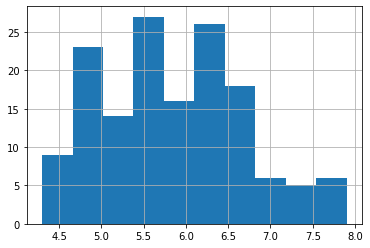

In [6]:
df["sepal length (cm)"].hist()


###  g) What are common methods to visualize more than 3 dimensions? Try PCA on IRIS data, what do you observe?




To visualise more than 3 dimensions we can find the distribuition of each individual features with class and understand which of the features are more decisive in determining the class/target.

Else we can also perform feature selection to reduce the dataset to lower number of dimensions. We can do this by feature reduction filters such chi-square and mutual information filters.

We can use feature extractiion techniwues such as LDA and PCA to convert the dataset into a lower dimensional and more meaningful feature space. We can then 

Following is the implenntation of PCA on iris dataset. It is easily visible that classes are quite seperable in x dimension that is the firt PCA component.


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

explained variance ratio (first two components): [0.92461872 0.05306648]


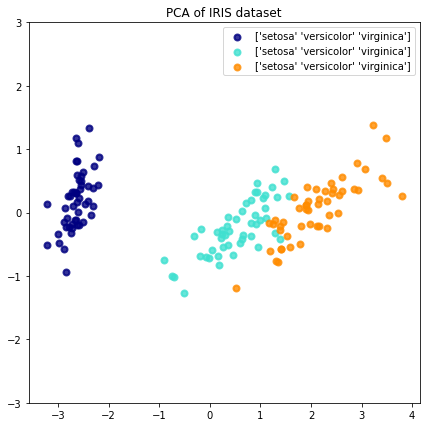

In [8]:
pca = PCA(n_components=2)
X_r = pca.fit(features).transform(features)

target_names = iris.target_names 
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure(figsize=(7,7))
plt.ylim((-3,3))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[classes == i, 0], X_r[classes == i, 1], color=color,       alpha=0.8, lw=lw, label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

## 


### a) How does the raw data look like? Load using any toolkit and view the features and labels.


The features contain the text of each news articles. Raw data is quite unstructured and reuires a lot of cleaning and preprocessing.
Labels are the 20 categories of newspapers further divided into subcategories

In [9]:
from sklearn.datasets import fetch_20newsgroups
data_train = fetch_20newsgroups(subset='train',
                                shuffle=True, random_state=42, )

data_test = fetch_20newsgroups(subset='test',
                               shuffle=True, random_state=42)


In [10]:
target_names = data_train.target_names
print(target_names)
data_train.target[:10]

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [11]:
print(len(data_train.data))
print(len((data_test.data)))

11314
7532


In [13]:
 print("\n".join(data_train.data[1].split("\n")[:])) 

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



### b) ) How do we convert the 20 Newsgroups raw text to numeric data in rows and columns? Discuss the potential options

We can convert text into vectors using a Bag-of-Words model where each word is a feature and feature vectors are of length of the vocabulary of the text. While 0,1 representation represent whether the word exists or not in the document.

Other vectorizing method include Tfid Vectorizer where each vector consists of tfid values of all the words in the documents and result in a sparse represantion of documents


### Visualize the popularly known tag-cloud on features or classes

In [14]:
from wordcloud import WordCloud, STOPWORDS

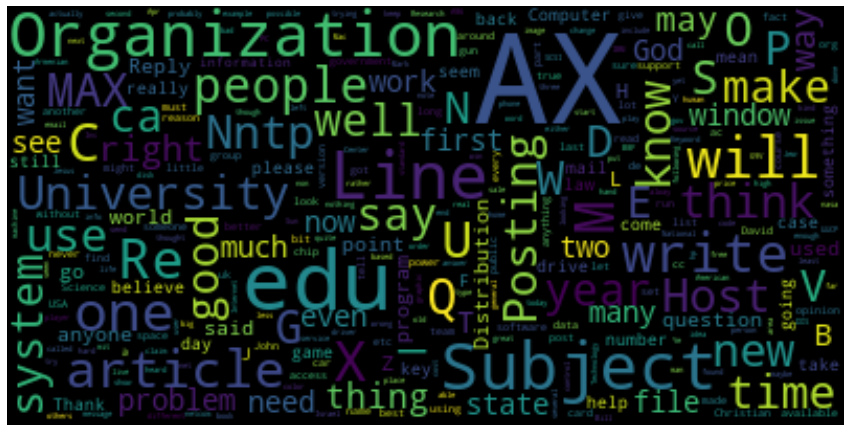

In [15]:
text = (' '.join(data_train.data))
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False,
                        background_color = 'black',
                        stopwords=stopwords,
                        max_words=300,
                        max_font_size=60, 
                        scale=1,
                        random_state=1, collocation_threshold=3
                       ).generate(text)

# Display the generated Word Cloud
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [17]:
# Train data type
print(type(data_train.data))
print(type(data_train.target))




<class 'list'>
<class 'numpy.ndarray'>


In [18]:
df1 = pd.DataFrame (data_train.data, columns = ['text'])

In [19]:
df1[500:505]

,text
500,From: bjorndahl@augustana.ab.ca\nSubject: Re: ...
501,From: x89olarte1@gw.wmich.edu\nSubject: My com...
502,From: bks2@cbnewsi.cb.att.com (bryan.k.strouse...
503,From: sera@zuma.UUCP (Serdar Argic)\nSubject: ...
504,From: kfl@access.digex.com (Keith F. Lynch)\nS...


### d) Explore and look for simple text features like n-grams, or find rare words by IDF values.

N-gram features are found by assigning n_gram range as (2,2) in the count vectorizer which takes each bigram as a feature. examples of the possible bigrams are printed below

In [24]:
text = df1['text']
model = CountVectorizer(ngram_range = (2, 2))
matrix = model.fit_transform(text)
bigrams = model.get_feature_names_out()


In [25]:
bigrams[7010:7050]

array(['activities characteristic', 'activities critical',
       'activities deaf', 'activities do', 'activities etc',
       'activities find', 'activities for', 'activities from',
       'activities glenn', 'activities grant', 'activities if',
       'activities in', 'activities include', 'activities included',
       'activities increased', 'activities involve', 'activities is',
       'activities it', 'activities key', 'activities like',
       'activities lines', 'activities medicine', 'activities more',
       'activities mr', 'activities ms', 'activities nationally',
       'activities noting', 'activities occurred', 'activities of',
       'activities on', 'activities one', 'activities or',
       'activities orbiting', 'activities organization',
       'activities payload', 'activities people', 'activities please',
       'activities plural', 'activities quite', 'activities recent'],
      dtype=object)

## Assignment 1.3

### a) Explain the goal of a text classification task in 1-2 simple sentences.

Classification of text documents mean correcty assigning the text tp a particular class label which could interesting given the context e.g. whether a document is realted to science/sports, or in case of a tweet it exhibit positive/negative sentiment.

###  b) What is meant by preprocessing in this context? Provide examples, discuss potential benefits.

Preprocesssing in text could be cleaning the text data of terms which are meaningless in describing the context of the documents. i.e. removing punctuations, special characters, stop words, stemming and lemmatization.

Preprocessing could also mean assigning meaningful feature vectors using words in text as simple BoW model could preven important information. Feature extraxtion using Tfid Vectorizers and then feature reduction using filters are example of preprocessing.

In [20]:
import re
import string

In [21]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

In [22]:
df1['text'] = df1['text'].apply(lambda x:clean_text(x))

In [23]:
df1[500:505]

,text
500,from bjorndahl augustana ab ca subject re d...
501,from gw wmich edu subject my computer gets...
502,from cbnewsi cb att com bryan k strouse s...
503,from sera zuma uucp serdar argic subject r...
504,from kfl access digex com keith f lynch su...


In [26]:
# So, first converting text data into vectors of numerical values using tf-idf to form feature vector
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 



In [27]:
print (data_train_vectors.shape)
print(data_train.target.shape)
print(type(data_train_vectors))

(11314, 130107)
(11314,)
<class 'scipy.sparse._csr.csr_matrix'>


In [28]:
# store training feature matrix in "Xtr"
Xtr = data_train_vectors
# store training response vector in "ytr"
ytr = data_train.target

In [29]:
# store testing feature matrix in "Xtt"
Xtt = data_test_vectors
# store testing response vector in "ytt"
ytt = data_test.target

### c) Provide an example of a machine learning model for this task.
A machine learning model could be built using simple Multinomial naive Bayes for text classification as shown below:

### d) What is a model? How do you represent a model?
Machine Learning model comprises of a workflow of learning paraameters of Ml algorithms by training over large set of data. This is followed by evaluation and the tuning of the model. It primarily consists of following steps:

1) Preprocessing of data <br>
2) Training <br>
3) Inference <br>
4) Evaluation <br>
5) Tuning <br>

### e) What learning method was used by your model? Discuss.
Multinomial Naive Bayes

In [34]:
# import the required module from scikit learn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [36]:
# Implementing classification model- using MultinomialNB

# Instantiate the estimator
clf_MNB = MultinomialNB(alpha=.01)

# Fit the model with data (aka "model training")
clf_MNB.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_MNB.predict(Xtt)
print("Predicted Class Labels:",y_pred)
# calculate accuracy


Predicted Class Labels: [ 7 11  0 ...  9  3 15]


### f) Revisit the goal in the first step, how do we objectively measure if we were able to achieve the goal?(Try to visualize)

A good measure here could be measuring the accuracy of our prediction i.e. total true prediction divided by the total number of predictions. A confusion matrix is used to visualise the performance of our model as shown below

In [41]:
print("Classification Accuracy:",metrics.accuracy_score(ytt, y_pred))

Classification Accuracy: 0.8352363250132767


In [42]:
plt.figure(figsize=(24,23))
print(classification_report(ytt, y_pred, labels=[1, 2, 3]))


              precision    recall  f1-score   support

           1       0.69      0.75      0.72       389
           2       0.74      0.63      0.68       394
           3       0.65      0.75      0.69       392

   micro avg       0.69      0.71      0.70      1175
   macro avg       0.69      0.71      0.70      1175
weighted avg       0.69      0.71      0.70      1175



<Figure size 1728x1656 with 0 Axes>

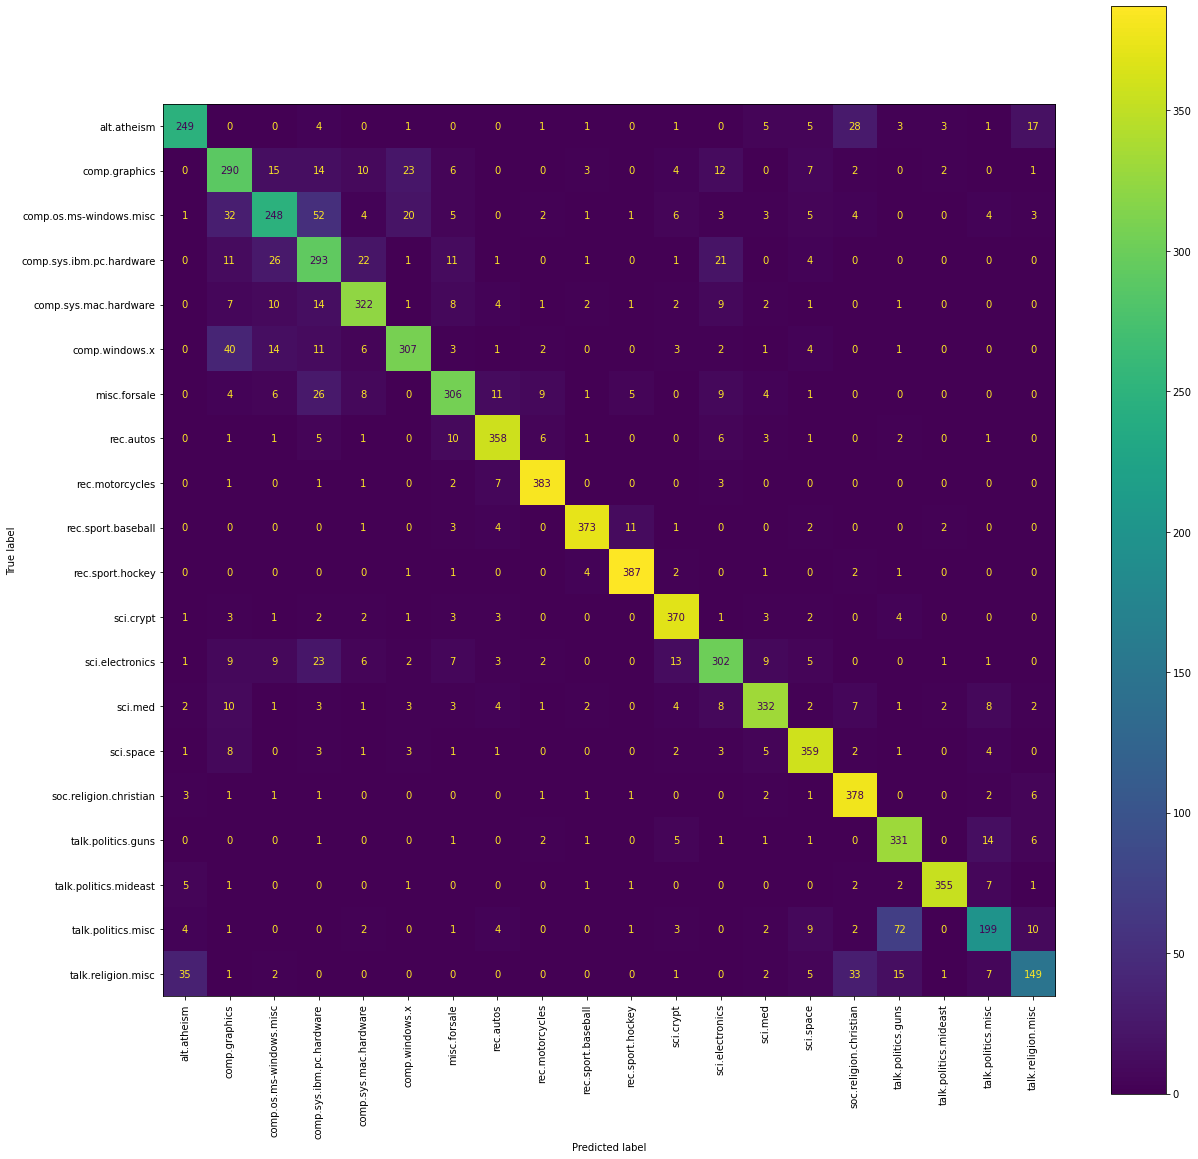

In [39]:
plt.rcParams["figure.figsize"] = (20,20)
ConfusionMatrixDisplay.from_estimator(
    clf_MNB, Xtt, ytt, display_labels=target_names, xticks_rotation="vertical"
)
plt.show()

In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
appdirs                      1.4.4
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.0
blis                         0.7.6
cachetools                   5.0.0
catalogue                    2.0.6
certifi                      2021.10.8
charset-normalizer           2.0.12
click                        8.0.4
colorama                     0.4.4
cycler                       0.11.0
cymem                        2.0.6
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  2.0
fonttools                    4.29.1
gast                         0.5.3
google-auth                  2.6.6